In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
labels = pd.read_csv('./dataset/new/labels.csv')
labels

,Position,Aggregated,1,2,3,4,5,6,7
0,0,0,0,0,0,0.0,0.0,0.0,NaN
1,1,0,0,0,0,0.0,0.0,0.0,NaN
2,2,0,0,0,0,0.0,0.0,0.0,NaN
3,3,0,0,0,0,0.0,0.0,0.0,NaN
4,4,0,0,0,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
119995,95,0,0,0,0,0.0,0.0,0.0,0.0
119996,96,0,0,0,0,0.0,0.0,0.0,0.0
119997,97,0,0,0,0,0.0,0.0,0.0,0.0
119998,98,0,0,0,0,0.0,0.0,0.0,0.0


In [3]:
def calculate_classified(labels: pd.DataFrame, precision_digits: int = 2):
    classified = []
    for index, r in labels[['1', '2', '3', '4', '5', '6', '7']].iterrows():
        #get rid on Nan to have really % of people classified, not the count of people divided by 7
        # not the same as number of annotators differs for each sample between 3 and 6
        row = r.dropna().to_numpy().tolist()
        # transform rows with 0's and some class label into 0's and 1's where it is labeled
        # is ok while we are guaranteed that only one of spicies is classified at each sample
    
        row = [1 if x != 0 else 0 for x in row]
    
        true_labeled = row.count(1)
        all_labeled = len(row)
    
        classified.append((true_labeled/all_labeled).__round__(precision_digits))
    return classified

In [4]:
labels['classified%'] = calculate_classified(labels)

In [26]:
labels['agreement'] = 2*abs([0.5]*len(labels) - labels['classified%'])

In [27]:
labels.sample(5)

,Position,Aggregated,1,2,3,4,5,6,7,classified%,agreement
25914,14,0,0,0,0,0.0,0.0,NaN,NaN,0.0,1.0
119344,44,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
21744,44,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
53910,10,0,0,0,0,0.0,0.0,NaN,NaN,0.0,1.0
100671,71,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0


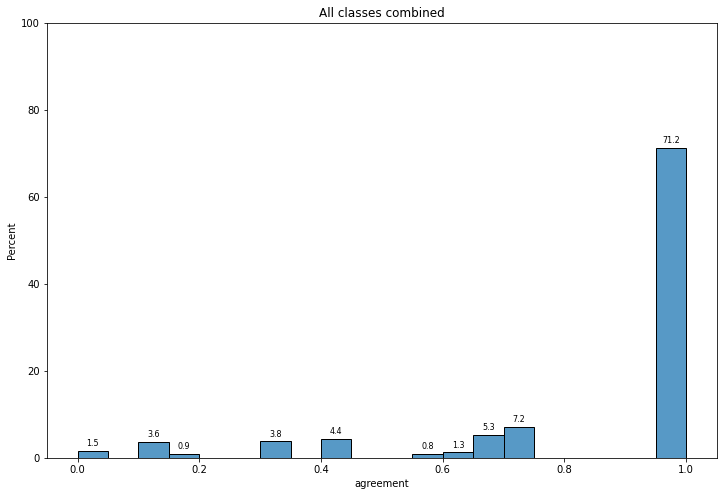

In [28]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=labels, x="agreement", stat='percent', element="bars", bins=20)
for container in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    bar_labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
    
    # set the bar label
    ax.bar_label(container, labels=bar_labels, fontsize=8, padding=3)
ax.set(title="All classes combined")
ax.set_ylim(0,100)
plt.show()

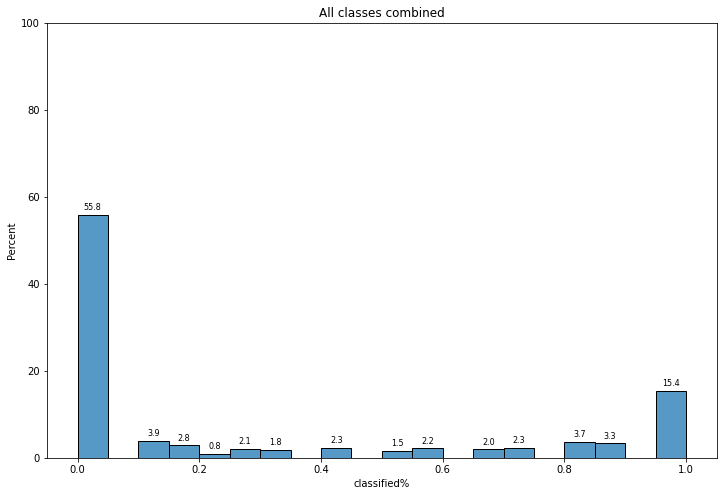

In [32]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=labels, x="classified%", stat='percent', element="bars", bins=20)
for container in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    bar_labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
    
    # set the bar label
    ax.bar_label(container, labels=bar_labels, fontsize=8, padding=3)
ax.set(title="All classes combined")
ax.set_ylim(0,100)
plt.show()

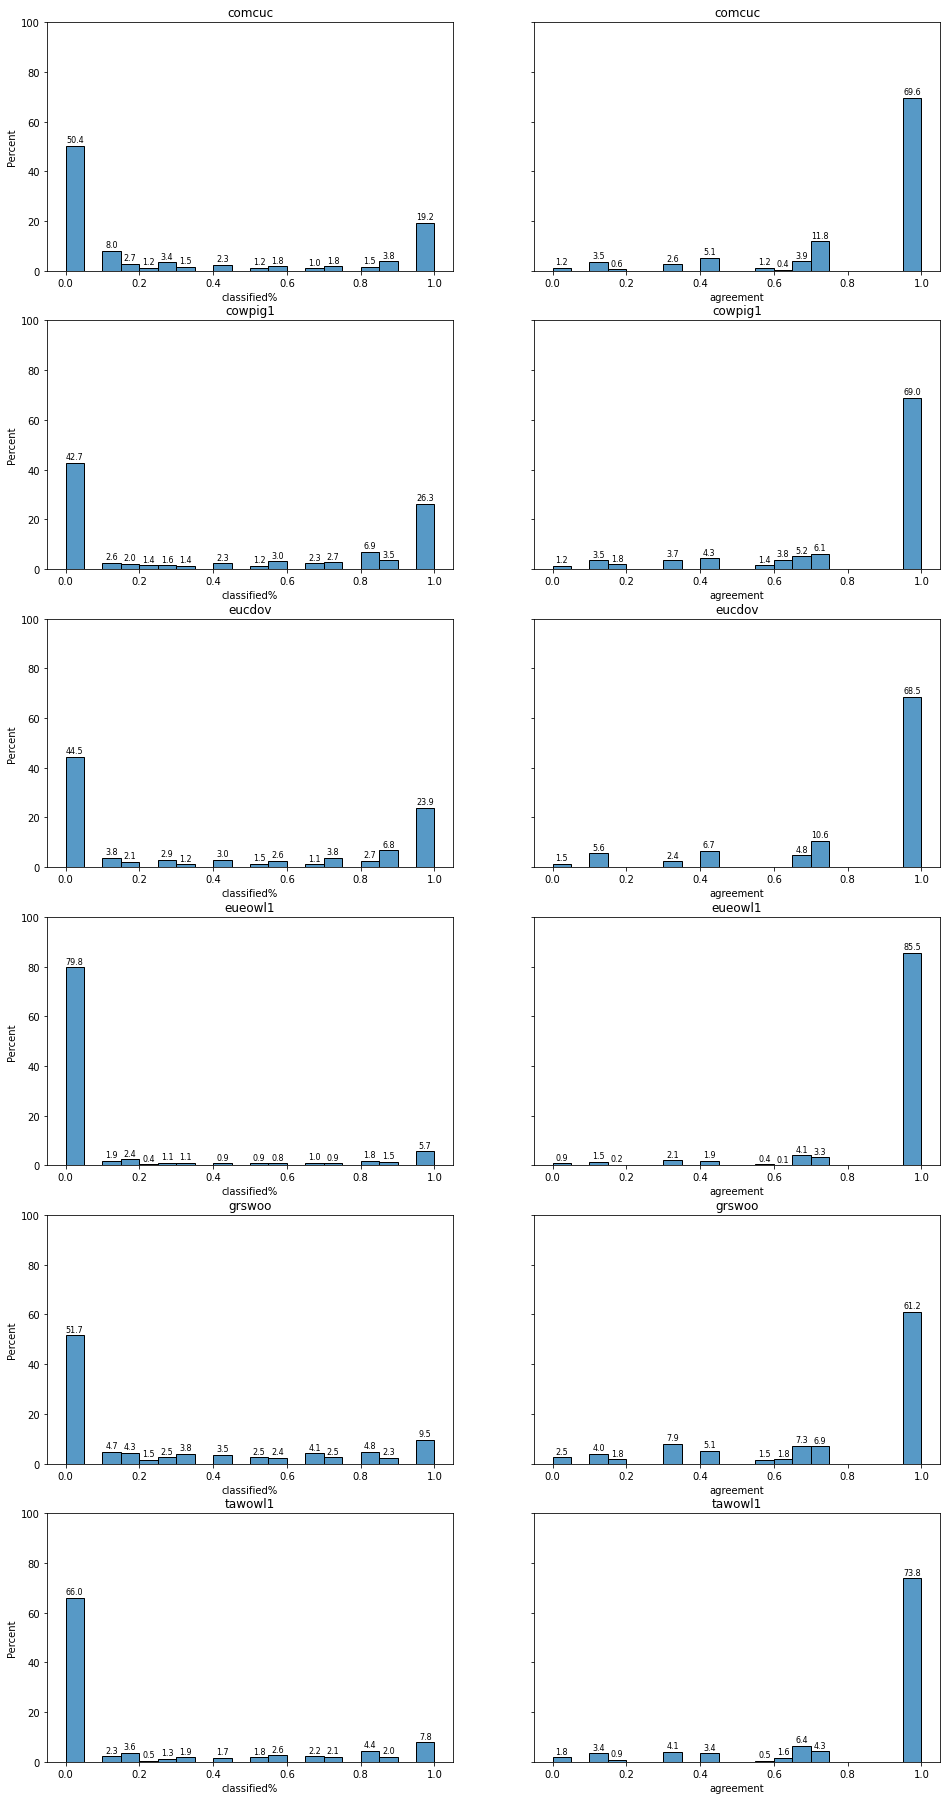

In [34]:
folders = ["comcuc", "cowpig1", "eucdov", "eueowl1", "grswoo", "tawowl1"]
fig, axes = plt.subplots(6, 2, sharey=True, figsize=(16, 32))
for i, folder in enumerate(folders):
    labels_folder = pd.read_csv('./dataset/new/' + folder + '_labels.csv')
    labels_folder['classified%'] = calculate_classified(labels_folder)
    labels_folder['agreement'] = 2*abs([0.5]*len(labels_folder) - labels_folder['classified%'])
    ax = sns.histplot(ax=axes[i%6, 0], data=labels_folder, x="classified%", stat='percent', element="bars", bins=20)
    
    for container in ax.containers:
        # customize the label to account for cases when there might not be a bar section
        ls = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
        # set the bar label
        ax.bar_label(container, labels=ls, fontsize=8, padding=1.5)
        
    ax.set_ylim(0,100)
    ax.set(title=folder)
    
    ax = sns.histplot(ax=axes[i%6, 1], data=labels_folder, x="agreement", stat='percent', element="bars", bins=20)
    
    for container in ax.containers:
        # customize the label to account for cases when there might not be a bar section
        ls = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
        # set the bar label
        ax.bar_label(container, labels=ls, fontsize=8, padding=1.5)
        
    ax.set_ylim(0,100)
    ax.set(title=folder)



In [ ]:
#plt.scatter(labels['Aggregated'], labels['classified%'])
print((labels.loc[labels['Aggregated'] != 0] == labels.loc[labels['classified%'] > 0.5]).all())

In [ ]:
print(len(labels.loc[(labels['Aggregated'] != 0) & (labels['classified%'] > 0.79)])/len(labels.loc[(labels['Aggregated'] != 0)]))

# cut at 0.65 and up is labeled truly
# leads to ±27 % of 1's, rest is classified as others